# final Project 
#### Sakar Pathak & Yogendra Bohara

In [1]:
#libraries
import numpy as np 
import pandas as pd 
import os
import json
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

import time
import datetime
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import mean_squared_error, roc_auc_score
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
import gc
import random
import warnings
from functools import partial
import os
import scipy as sp
from math import sqrt
from collections import Counter
from sklearn.ensemble import ExtraTreesClassifier
import scikitplot as skplt

In this dataset we will be developing algorithms to predict the adoptability of pets - 
specifically, how quickly is a pet adopted? If successful, they will be adapted into AI tools that will 
guide shelters and rescuers around the world on improving their pet profiles’ appeal, reducing animal 
suffering and euthanization.

In [2]:
### Importing informational datasets related to our main dataset (train.csv)
states = pd.read_csv("state_labels.csv")
breeds = pd.read_csv("breed_labels.csv")
colors = pd.read_csv("color_labels.csv")



In [3]:
states.head()

,StateID,StateName
0,41336,Johor
1,41325,Kedah
2,41367,Kelantan
3,41401,Kuala Lumpur
4,41415,Labuan


In [4]:
breeds.head()

,BreedID,Type,BreedName
0,1,1,Affenpinscher
1,2,1,Afghan Hound
2,3,1,Airedale Terrier
3,4,1,Akbash
4,5,1,Akita


In [5]:
colors.head()

,ColorID,ColorName
0,1,Black
1,2,Brown
2,3,Golden
3,4,Yellow
4,5,Cream


In [6]:
train = pd.read_csv("train.csv")
display(train.head())


,Unnamed: 0,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt,HasName,AdoptionSpeed
0,0,2,3,299,0,1,1,7,0,1,...,2,2,1,1,100,41326,0,1,1,2
1,1,2,1,265,0,1,1,2,0,2,...,3,3,1,1,0,41401,0,2,0,0
2,2,1,1,307,0,1,2,7,0,2,...,1,2,1,1,0,41326,0,7,1,3
3,3,1,4,307,0,2,1,2,0,2,...,1,2,1,1,150,41401,0,8,1,2
4,4,1,1,307,0,1,1,0,0,2,...,2,2,1,1,0,41326,0,3,1,2


In [7]:
# to find out the null values in total
train.isnull().sum()

Unnamed: 0       0
Type             0
Age              0
Breed1           0
Breed2           0
Gender           0
Color1           0
Color2           0
Color3           0
MaturitySize     0
FurLength        0
Vaccinated       0
Dewormed         0
Sterilized       0
Health           0
Quantity         0
Fee              0
State            0
VideoAmt         0
PhotoAmt         0
HasName          0
AdoptionSpeed    0
dtype: int64

In [8]:
# Rows and Columns
train.shape 

(14993, 22)

In [9]:
# to check the unique values of a variable
print("Vaccinated possible values: ", train['Vaccinated'].unique()) 
print("Number of possible values:", train['Vaccinated'].nunique())

print()

print("Adoption Speed possible values: ", train['AdoptionSpeed'].unique())


print("Adoption Speed possible values: ", train['AdoptionSpeed'].unique())
print("Adoption Speed possible values: ", train['AdoptionSpeed'].unique())

Vaccinated possible values:  [2 3 1]
Number of possible values: 3

Adoption Speed possible values:  [2 0 3 1 4]
Adoption Speed possible values:  [2 0 3 1 4]
Adoption Speed possible values:  [2 0 3 1 4]


In [10]:
display(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 22 columns):
Unnamed: 0       14993 non-null int64
Type             14993 non-null int64
Age              14993 non-null int64
Breed1           14993 non-null int64
Breed2           14993 non-null int64
Gender           14993 non-null int64
Color1           14993 non-null int64
Color2           14993 non-null int64
Color3           14993 non-null int64
MaturitySize     14993 non-null int64
FurLength        14993 non-null int64
Vaccinated       14993 non-null int64
Dewormed         14993 non-null int64
Sterilized       14993 non-null int64
Health           14993 non-null int64
Quantity         14993 non-null int64
Fee              14993 non-null int64
State            14993 non-null int64
VideoAmt         14993 non-null int64
PhotoAmt         14993 non-null int64
HasName          14993 non-null int64
AdoptionSpeed    14993 non-null int64
dtypes: int64(22)
memory usage: 2.5 MB


None

In [ ]:
# Dropping some columns: 
# train.drop(columns=['Description', 'RescuerID', 'PetID'], inplace=True)

In [11]:
# Changing Data types fo the columns

train['Color1'] = train['Color1'].apply(str)

In [12]:
train.head()

,Unnamed: 0,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt,HasName,AdoptionSpeed
0,0,2,3,299,0,1,1,7,0,1,...,2,2,1,1,100,41326,0,1,1,2
1,1,2,1,265,0,1,1,2,0,2,...,3,3,1,1,0,41401,0,2,0,0
2,2,1,1,307,0,1,2,7,0,2,...,1,2,1,1,0,41326,0,7,1,3
3,3,1,4,307,0,2,1,2,0,2,...,1,2,1,1,150,41401,0,8,1,2
4,4,1,1,307,0,1,1,0,0,2,...,2,2,1,1,0,41326,0,3,1,2


In [13]:
#train['NewName'] = train['Name']

In [14]:
#train['NewName'].fillna(value='No Name Yet', inplace=True)

In [15]:
#train['HasName'] = train['Name'].notnull().apply(int)

In [16]:
print("Number of 1 filled notnull names: ", sum(train['HasName']))
# sum(train['Name'].isnull())

Number of 1 filled notnull names:  13714


In [17]:
# train['HasName'][train['Name'] == 'No Name Yet'] = 0
#train.loc[train['Name'] == 'No Name Yet', 'HasName'] = 0

In [18]:
#train[train['Name'] == 'No Name Yet']['HasName']

In [19]:
#train.drop(columns=['NewName'], inplace=True)

In [20]:
# HasName column includes boolean values - animal with name represented with 1 and without name represented with 0
train['HasName']

0        1
1        0
2        1
3        1
4        1
5        0
6        1
7        1
8        0
9        1
10       1
11       1
12       1
13       1
14       1
15       1
16       1
17       1
18       1
19       0
20       1
21       1
22       1
23       1
24       1
25       1
26       1
27       1
28       1
29       1
        ..
14963    1
14964    1
14965    1
14966    1
14967    1
14968    1
14969    1
14970    1
14971    1
14972    1
14973    1
14974    1
14975    1
14976    1
14977    1
14978    1
14979    1
14980    1
14981    1
14982    1
14983    1
14984    0
14985    1
14986    1
14987    1
14988    0
14989    1
14990    1
14991    1
14992    1
Name: HasName, Length: 14993, dtype: int64

In [21]:
train['Type'] = train['Type'].apply(str)

In [22]:
train['Breed1'] = train['Breed1'].apply(str)

In [23]:
train['Breed2'] = train['Breed2'].apply(str)

In [24]:
train['Gender'] = train['Gender'].apply(str)

In [25]:
train['Color1'] = train['Color1'].apply(str)

In [26]:
train['Color3'] = train['Color3'].apply(str)

In [27]:
train['MaturitySize'] = train['MaturitySize'].apply(str)

In [28]:
train['FurLength'] = train['FurLength'].apply(str)

In [29]:
train['Vaccinated'] = train['Vaccinated'].apply(str)

In [30]:
train['Dewormed'] = train['Dewormed'].apply(str)

In [31]:
train['Sterilized'] = train['Sterilized'].apply(str)

In [32]:
train['Health'] = train['Health'].apply(str)

In [33]:
train['State'] = train['State'].apply(str)

In [34]:
train['AdoptionSpeed'] = train['AdoptionSpeed'].apply(str)

In [35]:
train['Color2'] = train['Color2'].apply(str)

In [36]:
train['PhotoAmt'] = train['PhotoAmt'].apply(int)

In [37]:
train['HasName'] = train['HasName'].apply(str)

### Now we have the column Hasname which represent the Name column - 0 represents animals with no name and 1 represents with name.
###  train.drop(columns=['Name'], inplace=True) (Original name column is now deleted.)

In [38]:
display(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 22 columns):
Unnamed: 0       14993 non-null int64
Type             14993 non-null object
Age              14993 non-null int64
Breed1           14993 non-null object
Breed2           14993 non-null object
Gender           14993 non-null object
Color1           14993 non-null object
Color2           14993 non-null object
Color3           14993 non-null object
MaturitySize     14993 non-null object
FurLength        14993 non-null object
Vaccinated       14993 non-null object
Dewormed         14993 non-null object
Sterilized       14993 non-null object
Health           14993 non-null object
Quantity         14993 non-null int64
Fee              14993 non-null int64
State            14993 non-null object
VideoAmt         14993 non-null int64
PhotoAmt         14993 non-null int64
HasName          14993 non-null object
AdoptionSpeed    14993 non-null object
dtypes: int64(6), object(16)
memory usa

None

### Re-ordering the columns in the dataset_ moving the dependent variable to the end 

In [39]:
train = train[['Type','Age','Breed1','Breed2','Gender','Color1','Color2','Color3','MaturitySize','FurLength','Vaccinated',
              'Dewormed','Sterilized','Health','Quantity','Fee','State','VideoAmt','PhotoAmt','HasName','AdoptionSpeed']]

In [40]:
print(train.index)

RangeIndex(start=0, stop=14993, step=1)


In [41]:
print(train)

      Type  Age Breed1 Breed2 Gender Color1 Color2 Color3 MaturitySize  \
0        2    3    299      0      1      1      7      0            1   
1        2    1    265      0      1      1      2      0            2   
2        1    1    307      0      1      2      7      0            2   
3        1    4    307      0      2      1      2      0            2   
4        1    1    307      0      1      1      0      0            2   
5        2    3    266      0      2      5      6      0            2   
6        2   12    264    264      1      1      0      0            2   
7        1    0    307      0      2      1      2      7            2   
8        2    2    265      0      2      6      0      0            2   
9        2   12    265      0      2      1      7      0            2   
10       1    2    307      0      1      1      2      7            2   
11       2    3    264      0      2      1      2      5            3   
12       1    2    307      0      1  

# Now we have Hasname column reprepsenting with boolean values 0 and 1. We will Drop the Name column.
train.drop(columns=['Name'], inplace=True) 

In [42]:
train.head()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,...,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt,HasName,AdoptionSpeed
0,2,3,299,0,1,1,7,0,1,1,...,2,2,1,1,100,41326,0,1,1,2
1,2,1,265,0,1,1,2,0,2,2,...,3,3,1,1,0,41401,0,2,0,0
2,1,1,307,0,1,2,7,0,2,2,...,1,2,1,1,0,41326,0,7,1,3
3,1,4,307,0,2,1,2,0,2,1,...,1,2,1,1,150,41401,0,8,1,2
4,1,1,307,0,1,1,0,0,2,1,...,2,2,1,1,0,41326,0,3,1,2


#### Let's check the distribution of target variable -> AdoptionSpeed

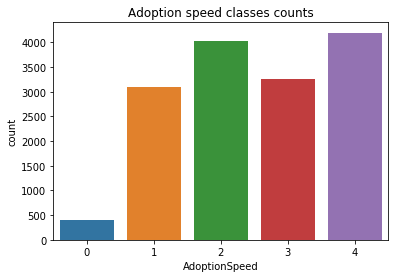

In [43]:
sns.countplot(data=train, x='AdoptionSpeed');
plt.title("Adoption speed classes counts");

Drawing the pie chart to see the percentage amount
---
* 0 - Pet was adopted on the same day as it was listed.
* 1 - Pet was adopted between 1 and 7 days (1st week) after being listed.
* 2 - Pet was adopted between 8 and 30 days (1st month) after being listed.
* 3 - Pet was adopted between 31 and 90 days (2nd & 3rd month) after being listed.
* 4 - No adoption after 100 days of being listed. (There are no pets in this dataset that waited between 90 and 100 days).

['0', '1', '2', '3', '4']
dict_values([410, 3090, 4037, 3259, 4197])


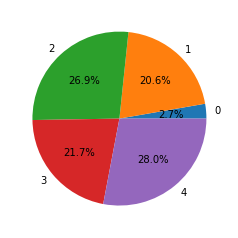

In [44]:
labels = sorted(train['AdoptionSpeed'].unique());
val = {}
print(labels)
for label in labels:
    val[label] = len(train[train['AdoptionSpeed'] == label])
print(val.values())
    
plt.pie(val.values(), labels=labels, autopct='%1.1f%%');

#### As we can see, the most common outcome is the animal isn’t adopted after 100 days of being listed. The least frequent outcome for these animals is getting adopetd on the day of listing.. The distribution is uneven. It looks like around 400 pets were adopted in the first day ( target label = 0)

To check how the AdoptionSpeed is related with the age of the pets (in months)

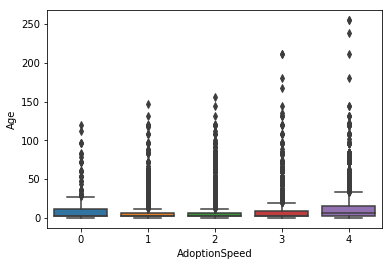

In [45]:
sns.boxplot(data=train, x='AdoptionSpeed', y='Age') ## age in months

### Target: Adoption speed

* 0 - Pet was adopted on the same day as it was listed.
* 1 - Pet was adopted between 1 and 7 days (1st week) after being listed.
* 2 - Pet was adopted between 8 and 30 days (1st month) after being listed.
* 3 - Pet was adopted between 31 and 90 days (2nd & 3rd month) after being listed.
* 4 - No adoption after 100 days of being listed. (There are no pets in this dataset that waited between 90 and 100 days). 

In [46]:
train.shape 

(14993, 21)

In [47]:
train.head()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,...,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt,HasName,AdoptionSpeed
0,2,3,299,0,1,1,7,0,1,1,...,2,2,1,1,100,41326,0,1,1,2
1,2,1,265,0,1,1,2,0,2,2,...,3,3,1,1,0,41401,0,2,0,0
2,1,1,307,0,1,2,7,0,2,2,...,1,2,1,1,0,41326,0,7,1,3
3,1,4,307,0,2,1,2,0,2,1,...,1,2,1,1,150,41401,0,8,1,2
4,1,1,307,0,1,1,0,0,2,1,...,2,2,1,1,0,41326,0,3,1,2


In [48]:
X = train.drop(columns='AdoptionSpeed') # features
y = train ['AdoptionSpeed'] # class/label

# splitting  the dataset into train and validation set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100) 

In [49]:
train.shape

(14993, 21)

In [50]:
x_train_2 = X_train[["Type","Age","PhotoAmt","HasName","Vaccinated"]]

In [51]:
y_train2 = y_train == "4"

In [52]:
y_train2.shape

(11994,)

In [56]:
from sklearn.model_selection import cross_val_score
from sklearn.cross_validation import StratifiedKFold, permutation_test_score
from sklearn.model_selection import train_test_split
model = KNeighborsClassifier(n_neighbors=50)

scores = cross_val_score(model, x_train_2, y_train2, cv=10, scoring='roc_auc')

score, permutation_scores, pvalue = permutation_test_score(model, x_train_2, y_train2, scoring="roc_auc", cv=10, n_permutations=100)


ModuleNotFoundError: No module named 'sklearn.cross_validation'

In [55]:
scores

array([0.6985835 , 0.67884036, 0.67769176, 0.66628727, 0.64337419,
       0.65317498, 0.67210538, 0.68124922, 0.66145898, 0.6720103 ])

In [ ]:
print(np.mean(scores))
st = np.std(scores)
print(str(np.mean(scores)) + "+-" + str(st))


In [57]:
pvalue

NameError: name 'pvalue' is not defined

## Testing with different variables to get better results 

In [58]:
train.shape

(14993, 21)

In [59]:
#To see which variable is more effective in predicting adption speed.

features = train.values
X1 = features[:,0:20]
Y1 = features[:,20]


#Feature Extraction 
model_5= ExtraTreesClassifier()
model_5.fit(X1, Y1)
print(model_5.feature_importances_)

C:\Users\shanket\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.01100757 0.14480524 0.06557006 0.05144205 0.03688491 0.08047851
 0.07234263 0.03990777 0.04486715 0.03078311 0.02951937 0.02682913
 0.02872688 0.01138073 0.04554374 0.04560094 0.06480501 0.01397405
 0.14161782 0.01391332]


In [60]:
train.head()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,...,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt,HasName,AdoptionSpeed
0,2,3,299,0,1,1,7,0,1,1,...,2,2,1,1,100,41326,0,1,1,2
1,2,1,265,0,1,1,2,0,2,2,...,3,3,1,1,0,41401,0,2,0,0
2,1,1,307,0,1,2,7,0,2,2,...,1,2,1,1,0,41326,0,7,1,3
3,1,4,307,0,2,1,2,0,2,1,...,1,2,1,1,150,41401,0,8,1,2
4,1,1,307,0,1,1,0,0,2,1,...,2,2,1,1,0,41326,0,3,1,2


Automatically created module for IPython interactive environment
Feature ranking:
1. feature 1 (0.142754)
2. feature 18 (0.136765)
3. feature 5 (0.080481)
4. feature 6 (0.077871)
5. feature 2 (0.067145)
6. feature 16 (0.067102)
7. feature 3 (0.047681)
8. feature 15 (0.045438)
9. feature 14 (0.044942)
10. feature 8 (0.044198)
11. feature 7 (0.040778)
12. feature 4 (0.040071)
13. feature 9 (0.036208)
14. feature 12 (0.028854)
15. feature 11 (0.026612)
16. feature 10 (0.023920)
17. feature 17 (0.014230)
18. feature 19 (0.013993)
19. feature 13 (0.011207)
20. feature 0 (0.009751)


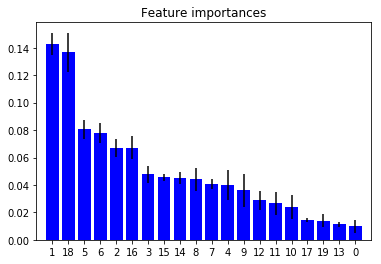

In [61]:
# This examples shows the use of forests of trees to evaluate the importance of features on an artificial classification
# task. The red bars are the feature importances of the forest, along with their inter-trees variability.


print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

# Build a classification task using 3 informative features
X, y = make_classification(n_samples=14993,
                           n_features=20,
                           n_informative=13,
                           n_redundant=0,
                           n_repeated=0,
                           n_classes=2,
                           random_state=0,
                           shuffle=False)

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X1, Y1)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X1.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X1.shape[1]), importances[indices],
       color="b", yerr=std[indices], align="center")
plt.xticks(range(X1.shape[1]), indices)
plt.xlim([-1, X1.shape[1]])
plt.show()

In [65]:
X = train.drop(columns='AdoptionSpeed') # features
y = train ['AdoptionSpeed'] # class/label

# split the dataset into train and validation set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100) 

In [66]:
x_train_3 = X_train[["Type","Age","PhotoAmt","HasName","Vaccinated","Dewormed","Sterilized", "Health",
                     "Breed1","Color3","Gender", "Breed2",]]

In [67]:
# Create Binary for Adoption classes
y_train3 = y_train == "4"

In [68]:
y_train3.shape

(11994,)

In [71]:
model_3 = KNeighborsClassifier(n_neighbors=10)

scores = cross_val_score(model_3, x_train_3, y_train3, cv=10, scoring ='roc_auc')

score, permutation_scores, pvalue = permutation_test_score(model_3, x_train_3, y_train3, scoring ="roc_auc", cv=10, n_permutations=100)


NameError: name 'permutation_test_score' is not defined

In [ ]:
scores

In [ ]:
np.mean(scores)

In [ ]:
pvalue

In [72]:
print(np.mean(scores))
st = np.std(scores)
print(str(np.mean(scores)) + "+-" + str(st))

0.6890354219181697
0.6890354219181697+-0.012350455753949259


#### Correlation between the varaibles 

In [73]:
import scikitplot as skplt
import matplotlib.pyplot as plt

In [74]:
df = x_train_3 

In [75]:
df.corr(method ='pearson') 

,Age,PhotoAmt
Age,1.000000,-0.086127
PhotoAmt,-0.086127,1.000000


In [76]:
y_train3.head

<bound method NDFrame.head of 10721     True
13114    False
13194     True
5442      True
4445      True
6830     False
8784      True
9903     False
10927    False
9710     False
3866      True
13011    False
7147     False
9912     False
8202     False
13625     True
3355     False
758      False
9883     False
3538     False
2817     False
12736     True
571       True
9155     False
8001     False
9592      True
13130     True
2268      True
13104    False
219      False
         ...  
1900     False
5787     False
2434     False
6230     False
5769     False
9723     False
11152    False
7738     False
1340     False
10091    False
11492     True
9871     False
4376      True
10992    False
13297     True
802       True
5646      True
7906      True
13890     True
4149      True
10082    False
14260    False
350      False
14218    False
79       False
12119    False
8039     False
14147     True
6936     False
5640     False
Name: AdoptionSpeed, Length: 11994, dtype: bool>

In [77]:
print(model)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=50, p=2,
           weights='uniform')


### Testing with Naive Bayes Classifier

In [78]:

x_train_3 = X_train[["Type","Age","PhotoAmt","HasName","Vaccinated","Dewormed","Sterilized","Health",
                     "Breed1","Color3","Gender","Breed2"]] # features
y_train3 = y_train == "4" # class/label

# split the dataset into train and validation set
x_train_3, x_test_3, y_train3, y_test3 = train_test_split(X, y, test_size=0.2, random_state=100) 

In [79]:
nbclf = GaussianNB()

nbclf.fit(x_train_3, y_train3)
print(nbclf.predict(x_test_3)[:10]) # displaying first 10 predictions
nbclf.score(x_test_3, y_test3)

['4' '1' '4' '4' '2' '2' '3' '1' '3' '1']


0.3294431477159053